In [48]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import  DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [50]:
data=pd.read_csv('drug200.csv')
df=data.copy()
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
data["Sex"]=le.fit_transform(data["Sex"])
data["BP"]=le.fit_transform(data["BP"])
data["Cholesterol"]=le.fit_transform(data["Cholesterol"])
data["Drug"]=le.fit_transform(data["Drug"])

In [53]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [54]:
x=data.drop(["Drug"],axis=1)
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [55]:
y=data.Drug
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=45)

In [57]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [58]:
ypred=tre.predict(xtest)
ypred

array([3, 3, 4, 3, 4, 4, 4, 1, 3, 3, 4, 2, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4,
       3, 4, 0, 2, 4, 4, 4, 3, 0, 4, 4, 4, 1, 2, 1, 0, 4, 4])

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.975

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[ 3,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 10,  1],
       [ 0,  0,  0,  0, 20]])

<Axes: >

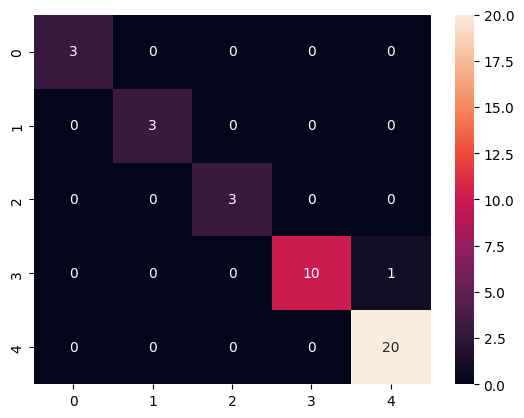

In [61]:
sns.heatmap(cm,annot=True)

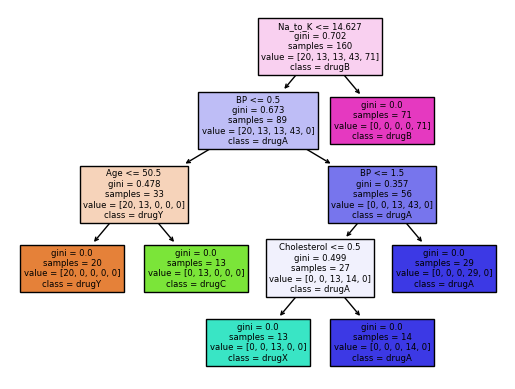

In [69]:
from matplotlib import pyplot as plt
from sklearn import tree
_=tree.plot_tree(tre,
                  feature_names=x.columns,
                  class_names=df.Drug.unique(),
                  filled = True
                  )